In [101]:
#Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression #선형회귀 라이브러리의 선형회귀분석 모듈 
from sklearn import preprocessing  #데이터 전처리 사용
from sklearn.decomposition import PCA #PCA 분석
from sklearn.preprocessing import StandardScaler #표준화 작업
from  sklearn.preprocessing import PolynomialFeatures #다항식 변환

#데이터 준비
df = pd.read_excel("c:/test/total_data.xlsx",delim_whitespace=True,encoding='cp949')
df=df.set_index('일시')




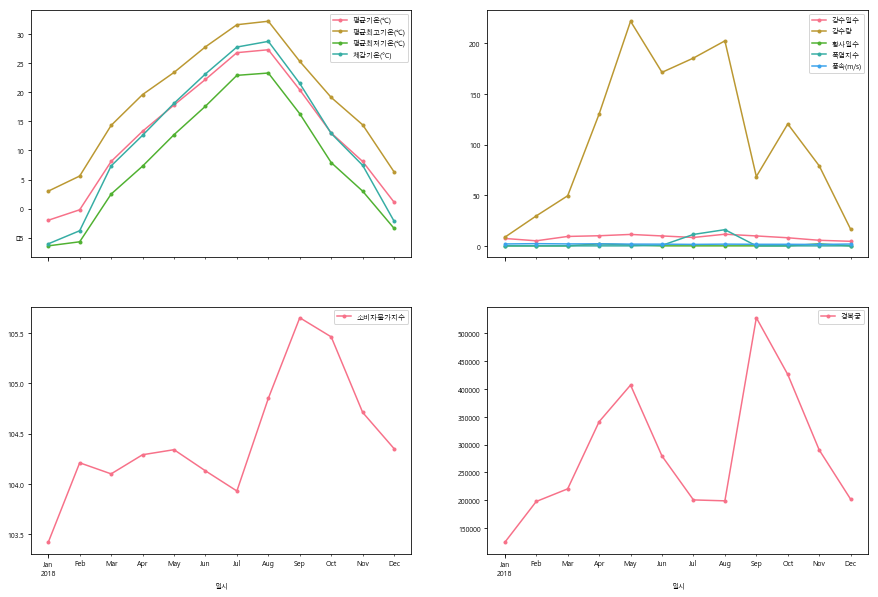

In [131]:
#데이터 형태 확인 -꺽은선 그래프

f, axes = plt.subplots(2, 2, figsize=(15,10), sharex=True)

#기상그래프
xdf = df[['평균기온(℃)','평균최고기온(℃)','평균최저기온(℃)','체감기온(°C)']]
plt.rc('font',family='Malgun Gothic',size=7)
xdf.plot(marker=".",ax=axes[0, 0])

#기상일수+먼지 그래프
ydf = df[['강수일수','강수량','황사일수','폭염지수','풍속(m/s)']]
plt.rc('font',family='Malgun Gothic',size=7)
ydf.plot(marker=".",ax=axes[0, 1])

#소비자 물가지수
zdf = df[['소비자물가지수']]
plt.rc('font',family='Malgun Gothic',size=7)
zdf.plot(marker=".",ax=axes[1, 0])

#경복궁
z1df = df[['경복궁']]
plt.rc('font',family='Malgun Gothic',size=7)
z1df.plot(marker=".",ax=axes[1, 1])

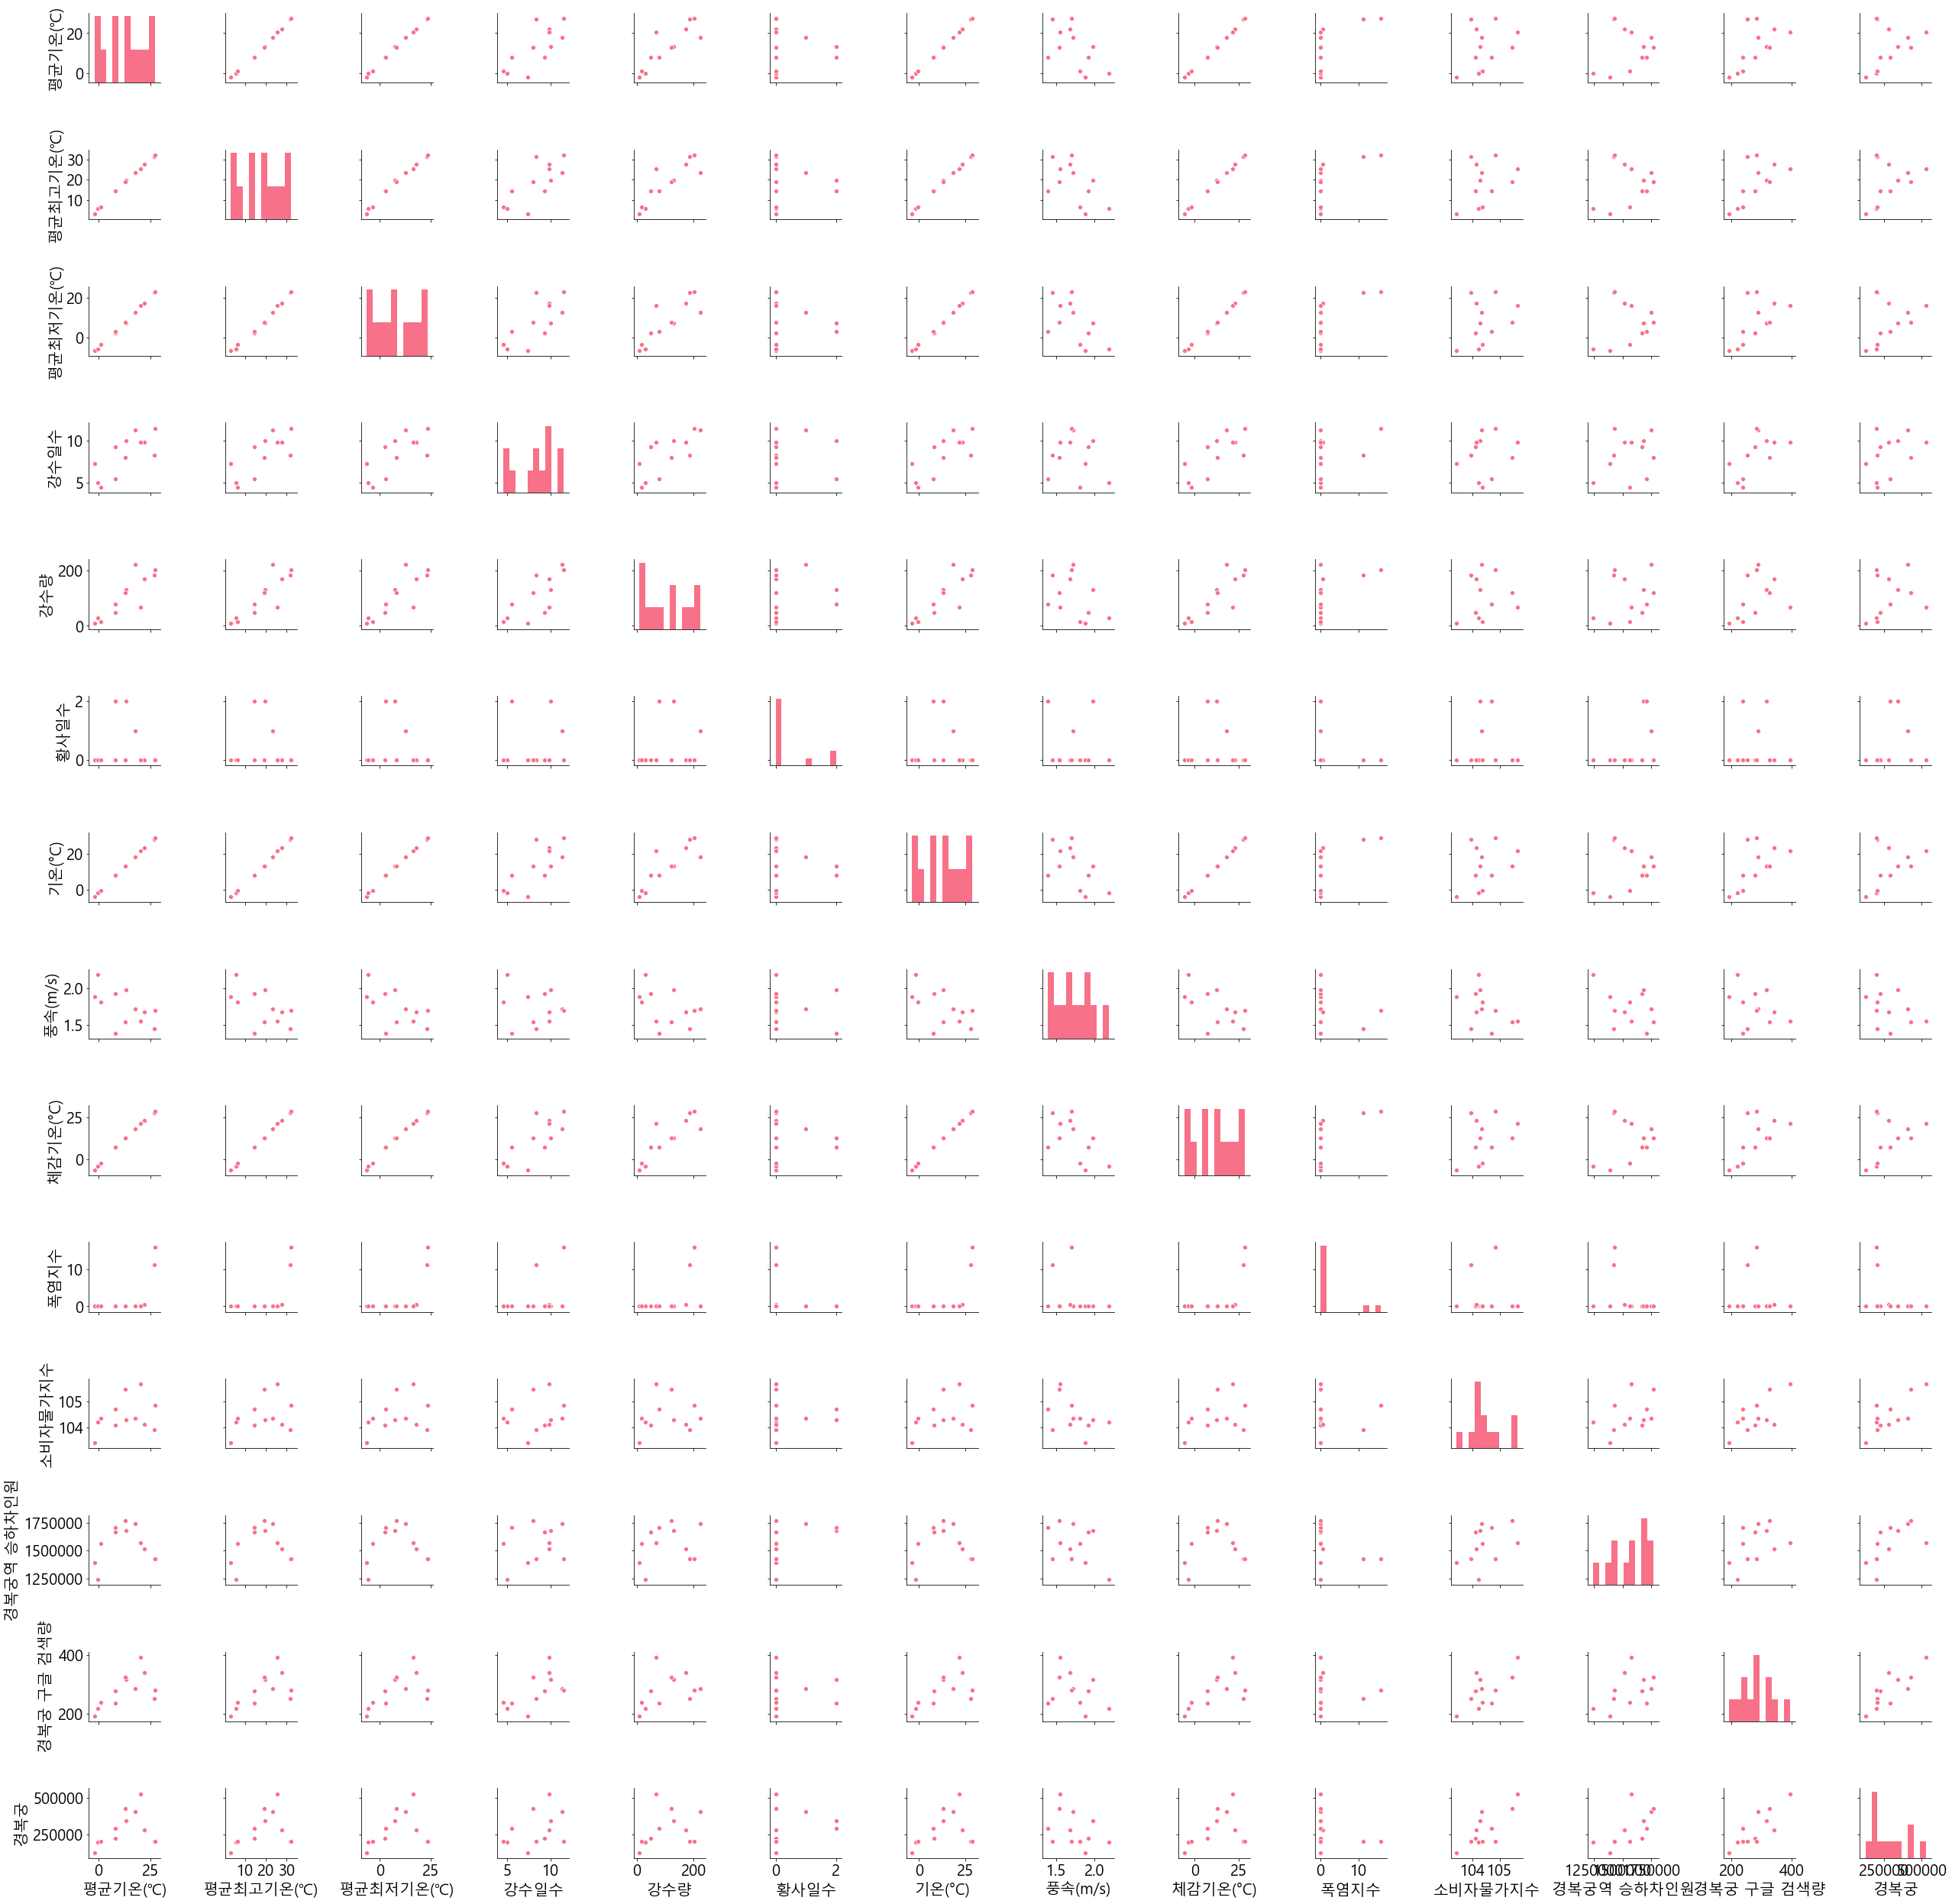

In [46]:
#데이터간의 산점도 확인 -pairplot
ndf = df[['평균기온(℃)','평균최고기온(℃)','평균최저기온(℃)','강수일수','강수량','황사일수','기온(°C)','풍속(m/s)','체감기온(°C)','폭염지수','소비자물가지수','경복궁역 승하차인원','경복궁 구글 검색량','경복궁']]
sns.set_palette("husl")
sns.pairplot(ndf)
plt.show()

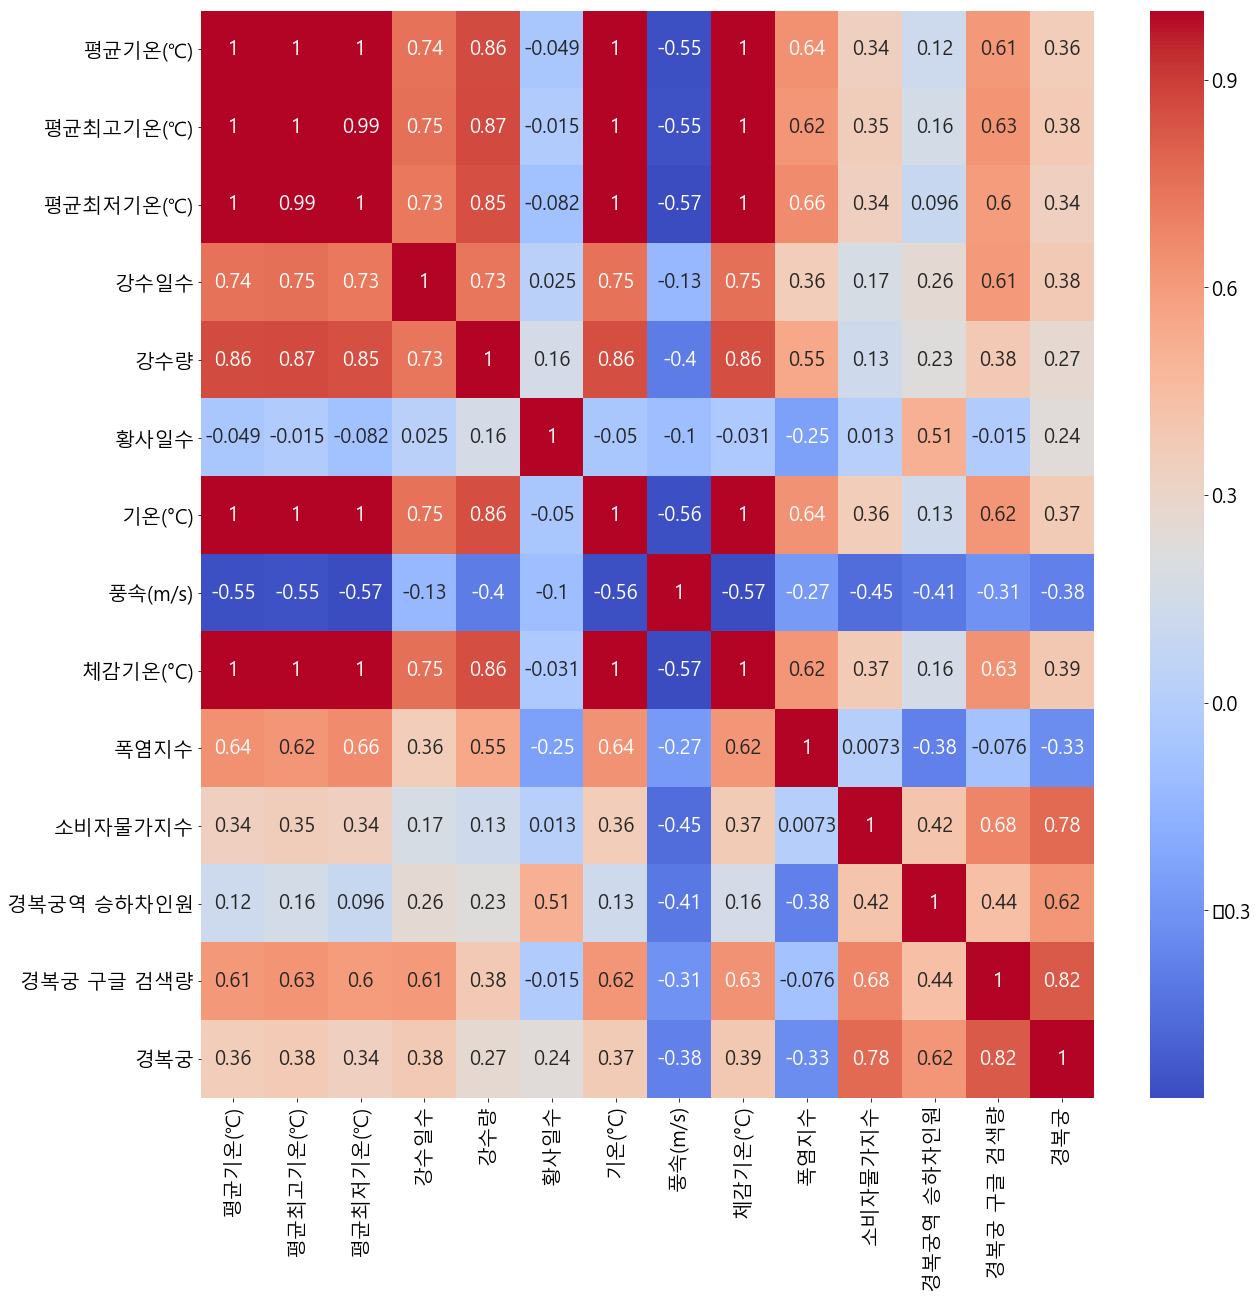

In [40]:
#FA인자분석- 공분산과 heatmap
plt.rc('font',family='Malgun Gothic',size=20)
corr_mat=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_mat, annot=True, cmap = 'coolwarm')
plt.savefig('ex_heatmap.png', format='png', dpi=300)
plt.show()



C:\Users\student\.conda\envs\test\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


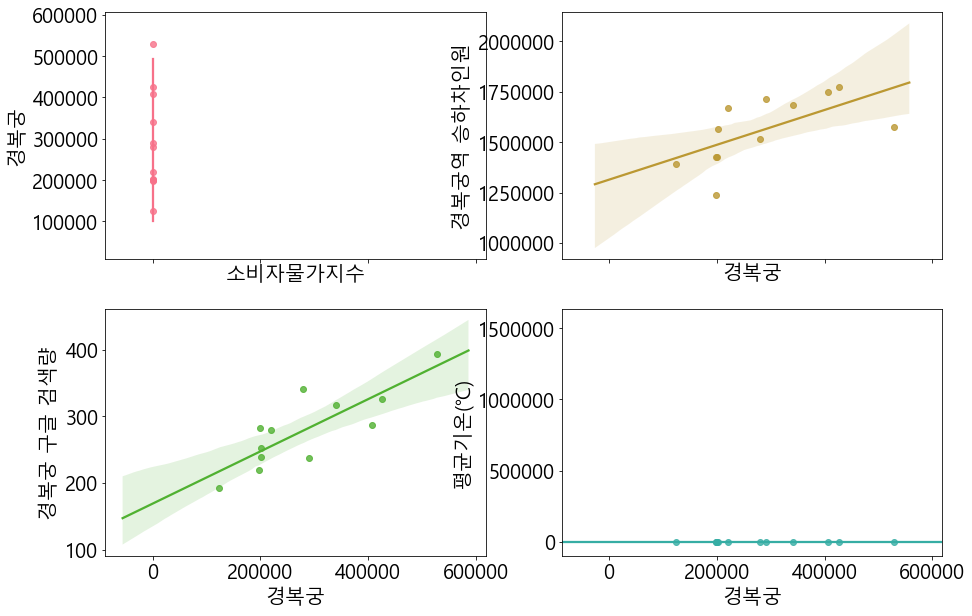

In [50]:
# # 각 선형회귀
# f, axes = plt.subplots(2,2, figsize=(15,10), sharex=True)

# sns.regplot('경복궁','소비자물가지수',data=ndf,ax=axes[0,0])
# sns.regplot('경복궁','경복궁역 승하차인원',data=ndf,ax=axes[0,1])
# sns.regplot('경복궁','경복궁 구글 검색량',data=ndf,ax=axes[1,0])
# sns.regplot('경복궁','평균기온(℃)',data=ndf,ax=axes[1,1])



In [63]:
plt.subplots(figsize=(10,7), sharex=True)
sns.regplot('경복궁','소비자물가지수',data=ndf)

AttributeError: module 'matplotlib.pyplot' has no attribute 'regplots'

C:\Users\student\.conda\envs\test\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


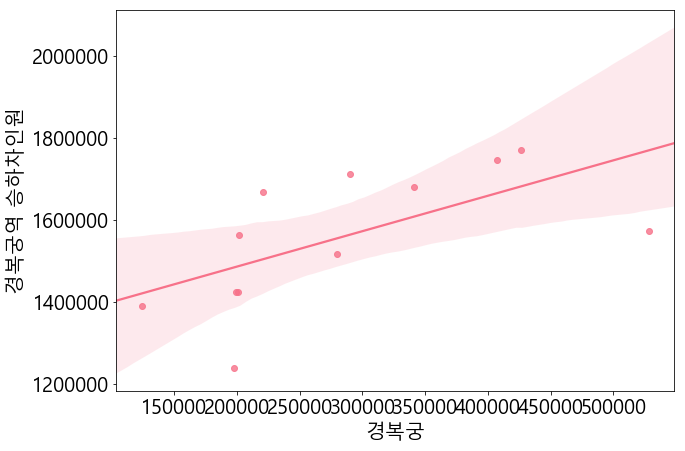

In [62]:
plt.subplots(figsize=(10,7), sharex=True)
sns.regplot('경복궁','경복궁역 승하차인원',data=ndf)

C:\Users\student\.conda\envs\test\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


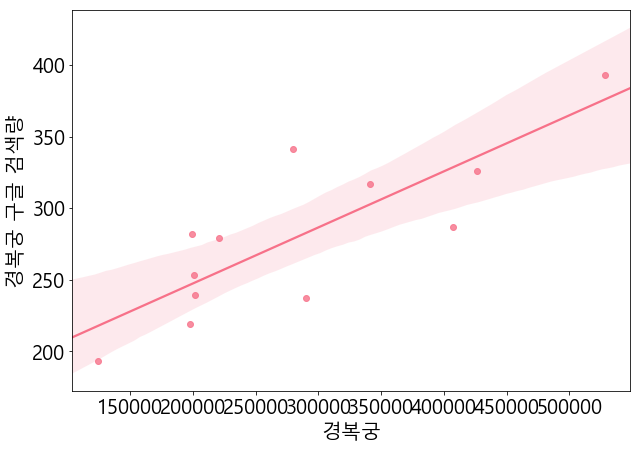

In [64]:
plt.subplots(figsize=(10,7), sharex=True)
sns.regplot('경복궁','경복궁 구글 검색량',data=ndf)

C:\Users\student\.conda\envs\test\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


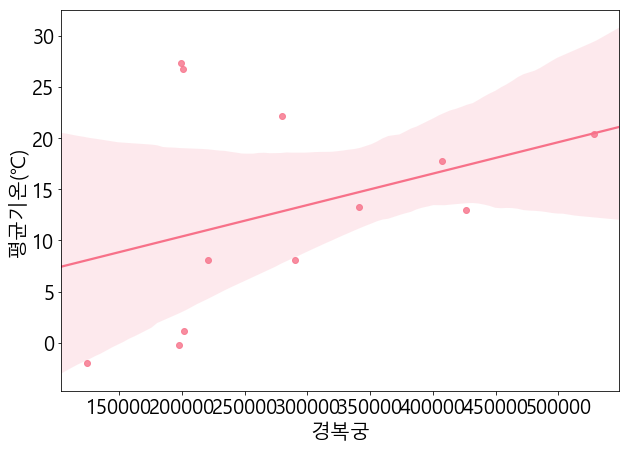

In [65]:
plt.subplots(figsize=(10,7), sharex=True)
sns.regplot('경복궁','평균기온(℃)',data=ndf)

In [139]:
# #PCA 주성분분석
 
# ndf = df[['강수일수','평균기온(℃)','최저기온(℃)','최고기온(℃)','강수량(mm)','황사일수','폭염일수','체감온도','미세먼지','소비자물가지수']]
# ydf = df[['경복궁']]

# #데이터 전처리 - 데이터 표준화 작업
# scaler=StandardScaler()
# scaler.fit(ndf.values)
# x_scaled=scaler.transform(ndf.values)

# #PCA 모델링
# pca_x=PCA()
# pca_x.fit(x_scaled)
# #data transform
# x_pca_x=pca_x.transform(x_scaled)

# #PCA 모델 산출값
# pd.DataFrame(pca_x.components_,columns=ndf.columns)

# # lambdas = pca_x.explained_variance_ratio_
# # var = 0
# # j = 0
# # for i in lambdas:
# #     var += i 
# #     percent = format(var * 100, '.2f')
# #     j += 1
# #     print('{} 번째 PC까지 사용했을 때 설명되는 분산의 비율: {}%'.format(j, percent))


,강수일수,평균기온(℃),최저기온(℃),최고기온(℃),강수량(mm),황사일수,폭염일수,체감온도,미세먼지,소비자물가지수
0,0.318523,0.368994,0.366600,0.367207,0.318793,-0.084848,0.274088,0.365563,-0.311312,0.280438
1,-0.163760,0.096452,0.049752,0.142722,0.268975,0.804411,-0.248910,0.059625,0.305956,0.249979
2,-0.493991,0.052564,0.041778,0.012716,-0.134314,-0.230209,-0.521715,0.055892,-0.406037,0.489990
3,0.012664,0.185732,0.268308,0.131918,0.254419,-0.226238,-0.599296,0.170026,0.171683,-0.585234
4,-0.191871,-0.124185,-0.031131,-0.162489,0.750226,-0.358748,0.117633,-0.300529,0.260060,0.238886
5,0.704154,-0.117766,-0.252984,-0.100950,0.161575,0.078213,-0.439784,-0.294243,-0.278483,0.162300
6,0.302869,0.076389,0.185154,-0.114195,-0.337122,-0.268895,-0.147217,0.155592,0.657959,0.436309
7,-0.010208,-0.157116,-0.714273,0.472774,0.082007,-0.161560,-0.038688,0.428758,0.148766,0.034947
8,-0.045833,0.453760,-0.102124,0.549561,-0.173568,-0.090462,0.019581,-0.652710,0.121655,0.005596
9,-0.030927,0.742679,-0.411737,-0.502055,0.061695,0.011723,0.027875,0.140736,-0.010465,-0.035342


(8, 10)
(8, 3)
-3.7671037527615345
기울기 a :  [-2.91038305e-11  1.11044797e+04  6.32620624e+04  5.00559948e+04
  1.09258486e+04 -5.42065116e+04  4.38958882e+04  5.63002480e+04
 -2.00925245e+04 -1.26018338e+04]
절편 b :  240534.4953554412


C:\Users\student\.conda\envs\test\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\student\.conda\envs\test\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


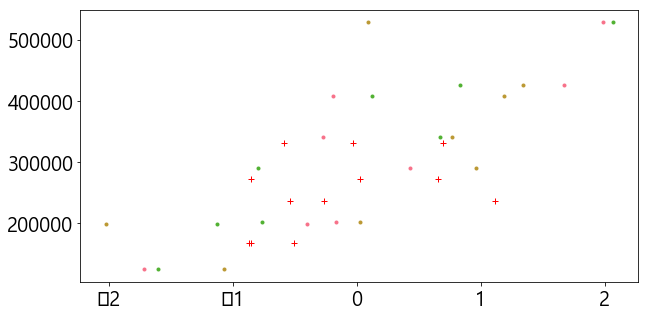

C:\Users\student\.conda\envs\test\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


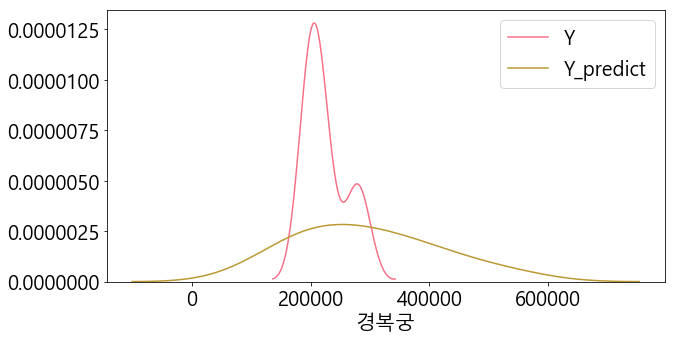

In [68]:
#다중 다항 회귀분석

#훈련 데이터와 테스트 데이터로 분리
X=df[['소비자물가지수','경복궁역 승하차인원','경복궁 구글 검색량']]   #독립변수 X : 무게
Y=df['경복궁']    #종속변수 Y : 

# X 표준화
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data 와 test data를 7:3 비율로 분리

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)  #랜덤 추출값 10

#다항식 변환
poly = PolynomialFeatures(degree=2)  # 2차항 적용
x_train_poly =poly.fit_transform(X_train)   # X학습데이터를 2차항으로 변형
print(x_train_poly.shape)
print(X_train.shape)

lr = LinearRegression()  #단순 선형회귀분석 객체 생성

lr.fit(x_train_poly, Y_train)  #학습


x_test_poly =poly.fit_transform(X_test) 
r_square = lr.score(x_test_poly, Y_test) # 결정 계수 계산
print(r_square )    #결정 계수 :    0.7087009262975685


print('기울기 a : ', lr.coef_)
print('절편 b : ', lr.intercept_)

#기울기 a :     [ 0.00000000e+00 -1.85768289e-02  1.70491223e-06]
# 절편 b :  62.58071221573144

y_test_predict = lr.predict(x_test_poly)  #test 데이터에 대한 모델의 예측값 구하기

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1,1, 1)
ax.plot(X_train, Y_train, '.', label='Train Data')
ax.plot(X_test, y_test_predict, 'r+', label='Predicted Value')  #학습한 회귀선
plt.show()
plt.close()

X_poly = poly.fit_transform(X)
y_predict = lr.predict(X_poly)   #전체 데이터 X에 대한 모델의 예측값 반환
fig = plt.figure(figsize=(10, 5))
ax1 = sns.distplot(Y_test, hist=False, label="Y")
ax2 = sns.distplot(y_predict, hist=False, label="Y_predict", ax=ax1)
plt.show()
plt.close()

(8, 10)
(8, 3)
0.0865057165507519
기울기 a :  [ 1.45519152e-11 -9.54885111e+03  6.41561467e+04  4.51637655e+04
  5.96379756e+03  1.16628479e+04 -1.58392209e+04  3.10717309e+04
  7.01390352e+03 -9.73681246e+03]
절편 b :  240462.33558056134


C:\Users\student\.conda\envs\test\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\student\.conda\envs\test\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


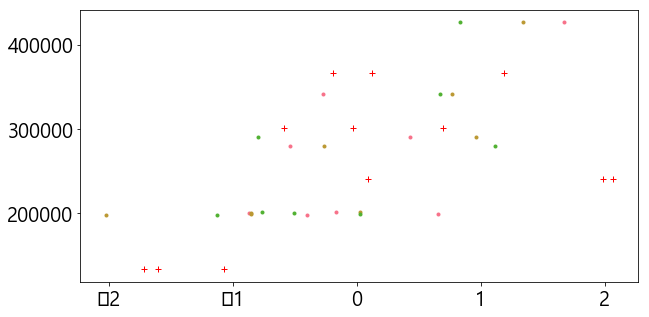

C:\Users\student\.conda\envs\test\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


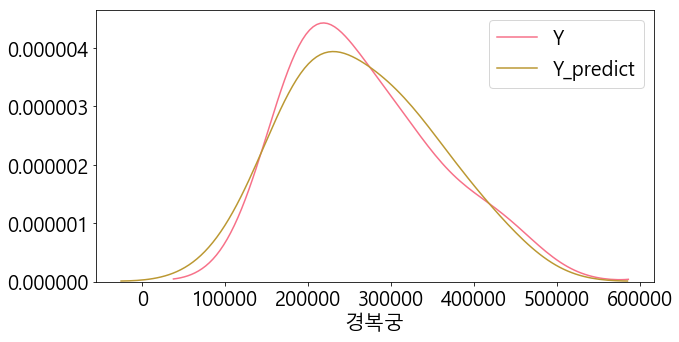

일시
2018-01-01    124211
2018-03-01    220494
2018-09-01    528333
2018-05-01    407217
Name: 경복궁, dtype: int64
실제인원: 124211, 예상인원: 133518.56917146384
실제인원: 220494, 예상인원: 301053.83624344587
실제인원: 528333, 예상인원: 241260.4219761039
실제인원: 407217, 예상인원: 366328.980221962


In [126]:
#다중 다항 회귀분석

#훈련 데이터와 테스트 데이터로 분리
X=df[['소비자물가지수','경복궁역 승하차인원','경복궁 구글 검색량']]   #독립변수 X : 무게
Y=df['경복궁']    #종속변수 Y : 

# X 표준화
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data 와 test data를 7:3 비율로 분리

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=180)  #랜덤 추출값 10

#다항식 변환
poly = PolynomialFeatures(degree=2)  # 2차항 적용
x_train_poly =poly.fit_transform(X_train)   # X학습데이터를 2차항으로 변형
print(x_train_poly.shape)
print(X_train.shape)

lr = LinearRegression()  #단순 선형회귀분석 객체 생성

lr.fit(x_train_poly, Y_train)  #학습


x_test_poly =poly.fit_transform(X_test) 
r_square = lr.score(x_test_poly, Y_test) # 결정 계수 계산
print(r_square )    #결정 계수 :    0.7087009262975685


print('기울기 a : ', lr.coef_)
print('절편 b : ', lr.intercept_)

#기울기 a :     [ 0.00000000e+00 -1.85768289e-02  1.70491223e-06]
# 절편 b :  62.58071221573144

y_test_predict = lr.predict(x_test_poly)  #test 데이터에 대한 모델의 예측값 구하기

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1,1, 1)
ax.plot(X_train, Y_train, '.', label='Train Data')
ax.plot(X_test, y_test_predict, 'r+', label='Predicted Value')  #학습한 회귀선
plt.show()
plt.close()

X_poly = poly.fit_transform(X)
y_predict = lr.predict(X_poly)   #전체 데이터 X에 대한 모델의 예측값 반환
fig = plt.figure(figsize=(10, 5))
ax1 = sns.distplot(Y_train, hist=False, label="Y")
ax2 = sns.distplot(y_predict, hist=False, label="Y_predict", ax=ax1)
plt.show()
plt.close()

Y_prediction =y_test_predict.flatten()   # 예측 값과 실제 값의 비교

for i in range(4):
    label = Y_test[i]
    prediction = Y_prediction[i]
    print("실제인원: %s, 예상인원: %s" %(label, prediction))

Epoch 1/200
8/8 [==============================] - 1s 76ms/step - loss: 43013935104.0000
Epoch 2/200
8/8 [==============================] - 0s 125us/step - loss: 39015936000.0000
Epoch 3/200
8/8 [==============================] - 0s 125us/step - loss: 35334676480.0000
Epoch 4/200
8/8 [==============================] - 0s 117us/step - loss: 32259420160.0000
Epoch 5/200
8/8 [==============================] - 0s 122us/step - loss: 29174249472.0000
Epoch 6/200
8/8 [==============================] - 0s 115us/step - loss: 26392313856.0000
Epoch 7/200
8/8 [==============================] - 0s 251us/step - loss: 23977240576.0000
Epoch 8/200
8/8 [==============================] - 0s 125us/step - loss: 21812992000.0000
Epoch 9/200
8/8 [==============================] - 0s 125us/step - loss: 19900313600.0000
Epoch 10/200
8/8 [==============================] - 0s 249us/step - loss: 18247729152.0000
Epoch 11/200
8/8 [==============================] - 0s 125us/step - loss: 16916625408.0000
Epoch 12/

Epoch 92/200
8/8 [==============================] - 0s 113us/step - loss: 12073910272.0000
Epoch 93/200
8/8 [==============================] - 0s 125us/step - loss: 12074010624.0000
Epoch 94/200
8/8 [==============================] - 0s 249us/step - loss: 12074085376.0000
Epoch 95/200
8/8 [==============================] - 0s 125us/step - loss: 12074136576.0000
Epoch 96/200
8/8 [==============================] - 0s 113us/step - loss: 12074161152.0000
Epoch 97/200
8/8 [==============================] - 0s 120us/step - loss: 12074159104.0000
Epoch 98/200
8/8 [==============================] - 0s 249us/step - loss: 12074131456.0000
Epoch 99/200
8/8 [==============================] - 0s 125us/step - loss: 12074084352.0000
Epoch 100/200
8/8 [==============================] - 0s 249us/step - loss: 12074021888.0000
Epoch 101/200
8/8 [==============================] - 0s 125us/step - loss: 12073944064.0000
Epoch 102/200
8/8 [==============================] - 0s 125us/step - loss: 12073859072.0

Epoch 182/200
8/8 [==============================] - 0s 124us/step - loss: 12072935424.0000
Epoch 183/200
8/8 [==============================] - 0s 125us/step - loss: 12072931328.0000
Epoch 184/200
8/8 [==============================] - 0s 124us/step - loss: 12072924160.0000
Epoch 185/200
8/8 [==============================] - 0s 249us/step - loss: 12072919040.0000
Epoch 186/200
8/8 [==============================] - 0s 125us/step - loss: 12072912896.0000
Epoch 187/200
8/8 [==============================] - 0s 117us/step - loss: 12072904704.0000
Epoch 188/200
8/8 [==============================] - 0s 125us/step - loss: 12072902656.0000
Epoch 189/200
8/8 [==============================] - 0s 131us/step - loss: 12072896512.0000
Epoch 190/200
8/8 [==============================] - 0s 125us/step - loss: 12072886272.0000
Epoch 191/200
8/8 [==============================] - 0s 250us/step - loss: 12072884224.0000
Epoch 192/200
8/8 [==============================] - 0s 249us/step - loss: 12072

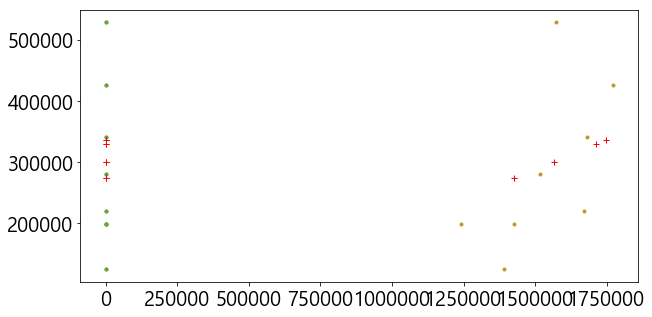

C:\Users\student\.conda\envs\test\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


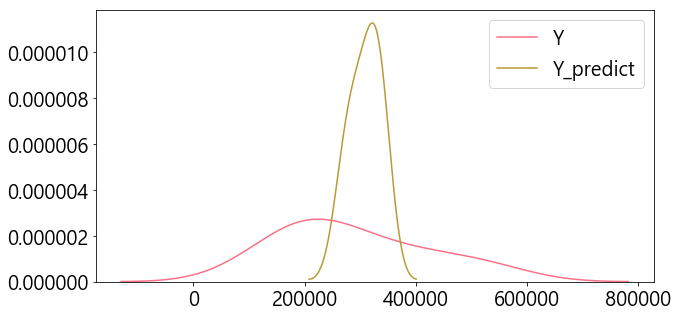

실제인원 200582.000, 예상인원: 273485.406
실제인원 201767.000, 예상인원: 300310.312
실제인원 407217.000, 예상인원: 335425.938
실제인원 290439.000, 예상인원: 328619.281


In [127]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Layer
import numpy
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

seed = 0 
numpy.random.seed(seed)  # seed 값 설정
tf.set_random_seed(seed)

# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# df[:]=scaler.fit_transform(df[:])
# 데이터 준비
df = pd.read_excel("c:/test/total_data.xlsx",delim_whitespace=True,encoding='cp949')
df=df.set_index('일시')


dataset = df.values
X = dataset[:,[10,11,12]]
Y = dataset[:,13]



# from sklearn import preprocessing
# X = preprocessing.StandardScaler().fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

model = Sequential()
model.add(Dense(30,input_dim=3,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1))
    

model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,Y_train,epochs=200,batch_size=10)



#flatten() -  데이터 배열이 몇 차원이든 모두 1차원으로 바꿔 읽기 쉽게 해 주는 함수
Y_prediction = model.predict(X_test).flatten()   # 예측 값과 실제 값의 비교

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1,1, 1)
ax.plot(X_train, Y_train, '.', label='Train Data')
ax.plot(X_test, Y_prediction, 'r+', label='Predicted Value')  #학습한 회귀선
plt.show()
plt.close()

X_poly = poly.fit_transform(X)
y_predict = lr.predict(X_poly)   #전체 데이터 X에 대한 모델의 예측값 반환
fig = plt.figure(figsize=(10, 5))
ax1 = sns.distplot(Y_train, hist=False, label="Y")
ax2 = sns.distplot(Y_prediction, hist=False, label="Y_predict", ax=ax1)
plt.show()
plt.close()


for i in range(4):
    label = Y_test[i]
    prediction = Y_prediction[i]
    print("실제인원 {:.3f}, 예상인원: {:.3f}".format(label, prediction))
